In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import gym
from collections import namedtuple
import matplotlib.pyplot as plt

In [2]:
from train_Q import ModelQ_t
from memory import ReplayMemory, ReplayDataset
from model import Policy

In [3]:
env = gym.make('MountainCar-v0')

In [4]:
BATCH_SIZE = 32
GAMMA = 0.999
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
TARGET_UPDATE = 10
LR = 0.001
Transition = namedtuple('Transition',
                        ('state', 'next_s1', 'next_s2', 'next_s3', 'reward_1', 'reward_2', 'reward_3'))
memory = ReplayDataset(10000, Transition)
loss_fn = nn.MSELoss().type(torch.FloatTensor)
steps_done = 0

In [5]:
policy_net = Policy(env)
target_net = Policy(env)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()

Policy(
  (linear1): Linear(in_features=2, out_features=200, bias=True)
  (linear2): Linear(in_features=200, out_features=3, bias=True)
  (linear3): Linear(in_features=200, out_features=3, bias=True)
  (relu): ReLU()
)

In [6]:
optimizer = optim.RMSprop(policy_net.parameters(), lr = LR)
ModelQ = ModelQ_t(policy_net, target_net, env, steps_done, EPS_END, EPS_START, EPS_DECAY, 
                  memory, BATCH_SIZE, GAMMA, loss_fn, optimizer, TARGET_UPDATE)

In [7]:
l = [[1, 2, 3, 0], [1, 1, 1, 0]]
A = torch.tensor(l)
A[A == 0] = 5
for s in A:
    print(s)

tensor([1, 2, 3, 5])
tensor([1, 1, 1, 5])


In [8]:
num_episodes = 50
history_loss, history_reward = ModelQ.train(num_episodes)

tensor([-0.5489,  0.0039]) tensor([-1.]) tensor([-1.]) tensor([-1.])


/home/igor/Study/Main/Machine Learning/JetBrains/train_Q.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(action)


tensor([-0.5193, -0.0047]) tensor([-1.]) tensor([-1.]) tensor([-1.])
tensor([-5.6153e-01,  8.4864e-06]) tensor([-1.]) tensor([-1.]) tensor([-1.])
tensor([-0.6306,  0.0061]) tensor([-1.]) tensor([-1.]) tensor([-1.])
tensor([-6.5029e-01, -5.3479e-04]) tensor([-1.]) tensor([-1.]) tensor([-1.])
tensor([-0.7218,  0.0089]) tensor([-1.]) tensor([-1.]) tensor([-1.])
tensor([-0.6247, -0.0025]) tensor([-1.]) tensor([-1.]) tensor([-1.])
tensor([-0.7410,  0.0058]) tensor([-1.]) tensor([-1.]) tensor([-1.])
tensor([-0.6250,  0.0201]) tensor([-1.]) tensor([-1.]) tensor([-1.])
tensor([-0.6462,  0.0021]) tensor([-1.]) tensor([-1.]) tensor([-1.])
tensor([-0.4852,  0.0148]) tensor([-1.]) tensor([-1.]) tensor([-1.])
tensor([-0.5625, -0.0168]) tensor([-1.]) tensor([-1.]) tensor([-1.])
tensor([-0.6519, -0.0225]) tensor([-1.]) tensor([-1.]) tensor([-1.])
tensor([-0.3296,  0.0261]) tensor([-1.]) tensor([-1.]) tensor([-1.])
tensor([-0.7878, -0.0181]) tensor([-1.]) tensor([-1.]) tensor([-1.])
tensor([-0.3869,  

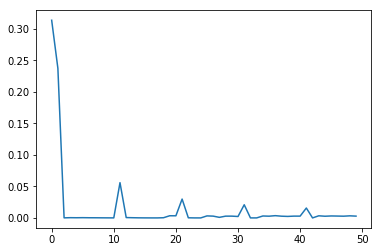

In [9]:
plt.plot(history_loss)

In [10]:
history_loss[3], history_loss[45:50]

(0.00037822084102247445,
 [0.0031107702379813418,
  0.0029472316288062044,
  0.0027500805701129137,
  0.0033070411028146935,
  0.0028415116263388455])

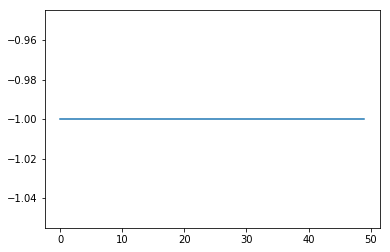

In [11]:
plt.plot(history_reward)

In [12]:
ModelQ.test(50, False)

tensor([0.5301, 0.0362]) tensor([100.])
tensor([0.5040, 0.0334]) tensor([100.])
tensor([0.5130, 0.0338]) tensor([100.])
tensor([0.5088, 0.0171]) tensor([100.])
tensor([0.5301, 0.0362]) tensor([100.])
tensor([0.5321, 0.0330]) tensor([100.])
tensor([0.5106, 0.0320]) tensor([100.])
tensor([0.5228, 0.0312]) tensor([100.])
tensor([0.5055, 0.0363]) tensor([100.])
tensor([0.5301, 0.0362]) tensor([100.])
tensor([0.5179, 0.0376]) tensor([100.])
tensor([0.5353, 0.0373]) tensor([100.])
tensor([0.5301, 0.0362]) tensor([100.])
tensor([0.5127, 0.0355]) tensor([100.])
tensor([0.5130, 0.0338]) tensor([100.])
tensor([0.5301, 0.0362]) tensor([100.])
tensor([0.5149, 0.0379]) tensor([100.])
tensor([0.5200, 0.0322]) tensor([100.])
tensor([0.5127, 0.0355]) tensor([100.])
tensor([0.5299, 0.0356]) tensor([100.])
tensor([0.5064, 0.0397]) tensor([100.])
tensor([0.5200, 0.0316]) tensor([100.])
tensor([0.5259, 0.0308]) tensor([100.])
tensor([0.5141, 0.0318]) tensor([100.])
tensor([0.5100, 0.0302]) tensor([100.])


In [13]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'reward'))
memory = ReplayDataset(150000, Transition)
history_rewards, history_discounted_rewards = ModelQ.test(500, False, memory=memory)

tensor([0.5247, 0.0376]) tensor([100.])
tensor([0.5301, 0.0362]) tensor([100.])
tensor([0.5130, 0.0338]) tensor([100.])
tensor([0.5198, 0.0328]) tensor([100.])
tensor([0.5301, 0.0362]) tensor([100.])
tensor([0.5010, 0.0329]) tensor([100.])
tensor([0.5119, 0.0367]) tensor([100.])
tensor([0.5239, 0.0257]) tensor([100.])
tensor([0.5284, 0.0293]) tensor([100.])
tensor([0.5086, 0.0314]) tensor([100.])
tensor([0.5118, 0.0239]) tensor([100.])
tensor([0.5249, 0.0285]) tensor([100.])
tensor([0.5174, 0.0218]) tensor([100.])
tensor([0.5183, 0.0320]) tensor([100.])
tensor([0.5301, 0.0362]) tensor([100.])
tensor([0.5223, 0.0326]) tensor([100.])
tensor([0.5183, 0.0320]) tensor([100.])
tensor([0.5301, 0.0362]) tensor([100.])
tensor([0.5118, 0.0346]) tensor([100.])
tensor([0.5102, 0.0351]) tensor([100.])
tensor([0.5301, 0.0362]) tensor([100.])
tensor([0.5153, 0.0347]) tensor([100.])
tensor([0.5152, 0.0388]) tensor([100.])
tensor([0.5178, 0.0318]) tensor([100.])
tensor([0.5223, 0.0326]) tensor([100.])


In [14]:
size_MCv0 = len(memory.memory)
size_MCv0

78128

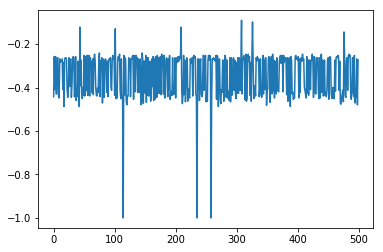

In [15]:
plt.plot(history_rewards)

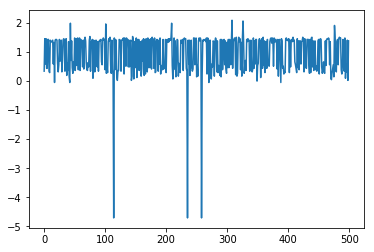

In [16]:
plt.plot(history_discounted_rewards)

In [17]:
from model import Actor, Critic, OrnsteinUhlenbeckActionNoise, NormalActionNoise, RandomActionNoise
from train import to_var, Optimizer_AC, Artificial_environment_noise_t, \
Artificial_environment_base_t, Artificial_environment_base_and_noise_t, Launcher_t, train, test, \
train_wo_launcher, Optimizer_Critic, Optimizer_Actor, fill_memory
from torch.optim.lr_scheduler import StepLR

In [18]:
env = gym.make('MountainCarContinuous-v0')
print(env.action_space, env.action_space.high, env.action_space.low)
print(env.observation_space.shape[0], env.observation_space.high, env.observation_space.low)

Box(1,) [1.] [-1.]
2 [0.6  0.07] [-1.2  -0.07]


In [19]:
num_episodes = 70
noise_power = 2.5
noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(1))
Artificial_environment_noise = Artificial_environment_noise_t(noise, env, noise_power)
Launcher = Launcher_t(Artificial_environment_noise, memory, GAMMA, BATCH_SIZE)
history_rewards, history_discounted_rewards, success = fill_memory(Launcher, num_episodes)
print(success, len(memory.memory) - size_MCv0)

11 65418


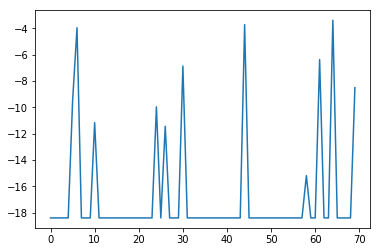

In [20]:
plt.plot(history_discounted_rewards)

In [21]:
LRA=0.001      #LEARNING RATE ACTOR
LRC=0.01     #LEARNING RATE CRITIC
epsilon = 1
epsilon_decay = 1./1000000
noise_power = 3
noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(1))
#noise = NormalActionNoise(np.zeros(1), 1)
print(noise_power*noise())
#q_scheduler = StepLR(q_optimizer, step_size = 5, gamma = 0.1)

Transition = namedtuple('Transition',
                        ('state', 'action', 'reward'))
loss_fn = nn.MSELoss().type(torch.FloatTensor)

[-0.12136484]


In [22]:
critic = Critic(env.observation_space.shape[0], 1)

In [23]:
q_optimizer = optim.Adam(critic.parameters(), lr=LRC)
q_scheduler = StepLR(q_optimizer, step_size = 5, gamma = 0.1)

optimizer_critic = Optimizer_Critic(critic, q_optimizer, memory, loss_fn, q_scheduler)

In [24]:
num_episodes = 20
history_loss = train_wo_launcher(memory, BATCH_SIZE, optimizer_critic, num_episodes)

episode  0 : loss =  (19.63439605012478, 0.0)  q =  -7.481726004749975
episode  1 : loss =  (15.835088462067135, 0.0)  q =  -7.514660807058209
episode  2 : loss =  (15.160203720914211, 0.0)  q =  -7.517519716460738
episode  3 : loss =  (14.809245224427057, 0.0)  q =  -7.515013720513028
episode  4 : loss =  (14.55300605249256, 0.0)  q =  -7.518291464659235
episode  5 : loss =  (14.394208844339797, 0.0)  q =  -7.52151215908201
episode  6 : loss =  (14.282963267618454, 0.0)  q =  -7.517484107375729
episode  7 : loss =  (14.22510919862878, 0.0)  q =  -7.519639322548321
episode  8 : loss =  (14.15193219492417, 0.0)  q =  -7.520680877602212
episode  9 : loss =  (14.084304424252723, 0.0)  q =  -7.5223812966329735
episode  10 : loss =  (14.058748166014452, 0.0)  q =  -7.522340019473103
episode  11 : loss =  (13.931786113586798, 0.0)  q =  -7.523392402270092
episode  12 : loss =  (13.916843443077028, 0.0)  q =  -7.524790272136591
episode  13 : loss =  (13.89569275952106, 0.0)  q =  -7.524635445

In [25]:
LRA = 0.001      #LEARNING RATE ACTOR
actor = Actor(env.observation_space.shape[0], 1, power = 3.0)
actor.linear1.load_state_dict(policy_net.linear1.state_dict())

policy_optimizer= optim.Adam(actor.parameters(), lr=LRA)
policy_scheduler = StepLR(policy_optimizer, step_size = 5, gamma = 0.1)
optimizer_actor = Optimizer_Actor(actor, critic, policy_optimizer, memory, loss_fn, policy_scheduler)

In [26]:
num_episodes = 20
history_loss = train_wo_launcher(memory, BATCH_SIZE, optimizer_actor, num_episodes)

episode  0 : loss =  (0.0, 3.568015665723845)  q =  -7.078383481986173
episode  1 : loss =  (0.0, 3.5677544299127115)  q =  -7.078222280998502
episode  2 : loss =  (0.0, 3.5677838998521847)  q =  -7.078199761072228
episode  3 : loss =  (0.0, 3.5678216120183026)  q =  -7.078237311679553
episode  4 : loss =  (0.0, 3.5677979315951855)  q =  -7.078107034102434
episode  5 : loss =  (0.0, 3.5678405451161637)  q =  -7.078302742512269
episode  6 : loss =  (0.0, 3.5677479992544865)  q =  -7.078403414199249
episode  7 : loss =  (0.0, 3.5677859135661802)  q =  -7.078145094657656
episode  8 : loss =  (0.0, 3.567811605905164)  q =  -7.07825232298843
episode  9 : loss =  (0.0, 3.567807027145275)  q =  -7.078343348475476
episode  10 : loss =  (0.0, 3.5678344994743565)  q =  -7.078338234885909
episode  11 : loss =  (0.0, 3.5678000237191)  q =  -7.078339455625175
episode  12 : loss =  (0.0, 3.5678232027421797)  q =  -7.078279160996181
episode  13 : loss =  (0.0, 3.5678061115066693)  q =  -7.07821135004

In [27]:
num_episodes = 10
Artificial_environment_base = Artificial_environment_base_t(actor, env)
Launcher = Launcher_t(Artificial_environment_base, GAMMA = GAMMA, BATCH_SIZE = BATCH_SIZE)
history_rewards, success = test(Launcher, num_episodes, True, True)
print(success)

episode  0 reward =  [-0.058679245]  discounted_reward =  [-1.078493309020996]  successes =  0
episode  1 reward =  [-0.057679843]  discounted_reward =  [-1.0616628646850585]  successes =  0
episode  2 reward =  [-0.0586025]  discounted_reward =  [-1.0784005165100097]  successes =  0
episode  3 reward =  [-0.058868907]  discounted_reward =  [-1.0815840721130372]  successes =  0
episode  4 reward =  [-0.058506962]  discounted_reward =  [-1.0790430068969727]  successes =  0
episode  5 reward =  [-0.058321368]  discounted_reward =  [-1.076605224609375]  successes =  0
episode  6 reward =  [-0.058939554]  discounted_reward =  [-1.0830731391906738]  successes =  0
episode  7 reward =  [-0.05835056]  discounted_reward =  [-1.0771409034729005]  successes =  0
episode  8 reward =  [-0.057979617]  discounted_reward =  [-1.0690547943115234]  successes =  0
episode  9 reward =  [-0.05855192]  discounted_reward =  [-1.0789234161376953]  successes =  0
0.0


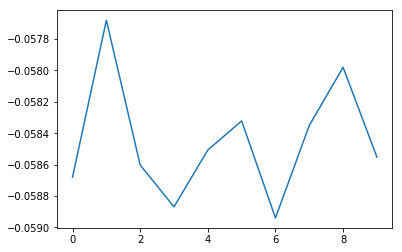

In [28]:
plt.plot(history_rewards)

In [29]:
optimizer = Optimizer_AC(actor, critic, q_optimizer, policy_optimizer, memory, loss_fn, q_scheduler)

In [30]:
num_episodes = 20
history_loss = train_wo_launcher(memory, BATCH_SIZE, optimizer, num_episodes)

episode  0 : loss =  (13.393158800553412, 3.8912408624189325)  q =  -7.634443850587427
episode  1 : loss =  (13.392241938150633, 3.8913919777586017)  q =  -7.635009599114655
episode  2 : loss =  (13.392294830261898, 3.8914193252625022)  q =  -7.634977844746794
episode  3 : loss =  (13.392201068054462, 3.8914638657966)  q =  -7.634890255256258
episode  4 : loss =  (13.392056020483599, 3.8914147460065602)  q =  -7.634856909021861
episode  5 : loss =  (13.392142618405762, 3.8914631729689977)  q =  -7.634976355188721
episode  6 : loss =  (13.392193751449266, 3.891451753324953)  q =  -7.635021885112094
episode  7 : loss =  (13.392353649283988, 3.8914320920831407)  q =  -7.635075723014131
episode  8 : loss =  (13.392151162482252, 3.8914366750948113)  q =  -7.635022083245055
episode  9 : loss =  (13.392169982544777, 3.8914608536405724)  q =  -7.634984199112141
episode  10 : loss =  (13.392455537033255, 3.891372559736348)  q =  -7.6350996316781385
episode  11 : loss =  (13.392466964507664, 3.8

In [29]:
num_episodes = 10
Artificial_environment_base = Artificial_environment_base_t(actor, env)
Launcher = Launcher_t(Artificial_environment_base, GAMMA = GAMMA, BATCH_SIZE = BATCH_SIZE)
history_rewards, success = test(Launcher, num_episodes, False, True)
print(success)

episode  0 reward =  [-5.664634e-05]  discounted_reward =  [-0.0005953777115792036]  successes =  0
episode  1 reward =  [-0.005013072]  discounted_reward =  [-0.029440370202064515]  successes =  0
episode  2 reward =  [-3.2341237e-07]  discounted_reward =  [-6.072853648220189e-06]  successes =  0
episode  3 reward =  [-0.00013740928]  discounted_reward =  [-0.0007915842346847057]  successes =  0
episode  4 reward =  [-0.062709376]  discounted_reward =  [-1.4189083099365234]  successes =  0
episode  5 reward =  [-2.4150327e-07]  discounted_reward =  [-4.475811510928906e-06]  successes =  0
episode  6 reward =  [-2.2306085e-07]  discounted_reward =  [-4.108088614884764e-06]  successes =  0
episode  7 reward =  [-0.00017822105]  discounted_reward =  [-0.000896761566400528]  successes =  0
episode  8 reward =  [-0.0025821347]  discounted_reward =  [-0.01068783923983574]  successes =  0
episode  9 reward =  [-0.080436155]  discounted_reward =  [-1.6631385803222656]  successes =  0
0.0


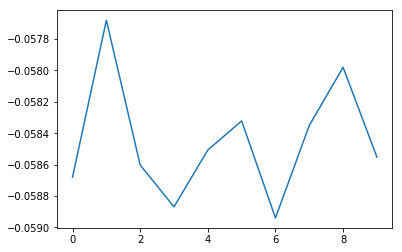

In [31]:
plt.plot(history_rewards)